# Relevant Libraries

In [1]:
# import relevant libraries

import nltk
#nltk.download('punkt')
import os
import random
#!pip install -U textblob
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline
from scipy.ndimage.filters import gaussian_filter1d

# Relevant Functions

In [2]:
# sort tuple by year
def Sort_Tuple(tup):  
    lst = len(tup)  
    for i in range(0, lst):  
          
        for j in range(0, lst-i-1):  
            if (tup[j][1] > tup[j + 1][1]):  
                temp = tup[j]  
                tup[j]= tup[j + 1]  
                tup[j + 1]= temp  
    return tup  

# counting frequencies of words in total dictionary
def countWords(dict):
    word_dict = {}
    for file in dict:
        for word in dict[file][2]:
            word = word.lower()
            if word not in stop_words:
                if word not in word_dict:
                    word_dict[word] = 1
                else:
                    word_dict[word] += 1
    return word_dict

# make dictionary of words        
def make_dict(mlist):
    wdict = {}
    for file in mlist:
        for word in crown_dict[file][2]:
            word = word.lower()
            if word not in stop_words:
                if word not in wdict:
                    wdict[word] = 1
                else:
                    wdict[word] += 1
    return wdict

def makeTotSentences(dic):
    totSentences = []
    for file in dic:
        for sentence in dic[file][1]:
            if len(sentence.split())>3:
                totSentences.append([sentence])
    return totSentences

In [3]:
# upload archive
# crown_dict: filename -> [raw text]
directory = '/users/catherineparnell/OneDrive - Dartmouth College/CrownDocuments'

file_list = []
crown_dict ={}

for file in os.listdir(directory):
    file_list.append(file)
    print(file)
    fil = open(os.path.join(directory, file)) #encoding="utf8", errors='ignore'
    raw_text = fil.read()
    crown_dict[file] = [raw_text]
    fil.close()

James'ProclamationForTheUseOfTheBookOfCommonPrayer_JamesI_1604.txt
ElizabethsActofUniformity_Elizabeth_1559.txt
ElizabethsSupremacyAct_Elizabeth_1559.txt
EdwardVItoBishops_Edward_1551.txt
QueenElizabethsProclamationtoForbidPreaching_Elizabeth_1558.txt
EdwardVItoBishops2_Edward_1551.txt
AnActOfUniformity_Edward_1549.txt
RepealofEdwardVI_MaryI_1553.txt
TheKing'sDeclarationPrefixedToTheArticlesOfReligion_CharlesI_1628.txt
RoyalProclamation_HenryVIII_1520.txt
DirectionConceringPreachers_JamesI_1622.txt
TheKing'sMajesty'sDeclarationToHisSubjectsConcerningLawfulSportsToBeUsed_CharlesI_1633.txt
TheInjunctionsof1559_Elizabeth_1559.txt
DeclarationAtRychemonde_Mary_1553.txt
TheActAgainstPuritans_Elizabeth_1593.txt
Act_MaryI_1555.txt
Proclamation_MaryI_1553.txt
NoIdeaWhatThisIs_MaryI_1554.txt
ActAgainstJesuitsandSeminarists_Elizabeth_1585.txt
Declaration_MaryI_1553.txt
TheActOfSupremacy_HenryVIII_1534.txt
TheActAgainstRecusants_Elizabeth_1593.txt
TheSubscriptionAct_Elizabeth_1571.txt
MaryTudortoP

In [4]:
# Tokenizes texts for each book and puts in dictionary for future reference
# crown_dict: filename -> [raw text, sentences, words]

for book in crown_dict:   
    sentences = sent_tokenize(crown_dict[book][0])
    #print("found",len(sentences),"sentences")

    words = word_tokenize(crown_dict[book][0])
    #print("found",len(words),"words")
    
    #dictionary of titles to list of sentences and words
    crown_dict[book].append(sentences)
    crown_dict[book].append(words)

In [5]:
# stop words
stop_words = [",","the","and","of","or","to","in","shall","be","that","any","by",".",
              "such","as","this","for","same","all","said","other","'s",";",
              "her","is","every","[","]","they","within", "our", "not", "so",
              "made", "no", "then", ":", "do", "from", "if", "it", "which", "at", "with",
             "thereof","upon", "a", "because", "used", "some", "but", "aforesaid", "also",
             ")","(", "what", "&", "may", "are", "their", "them", "sayde", "suche", "shalbe", "anye", "sayd",
             "thesaid", "/", "...", "/", "either"]

crown_word_dict = countWords(crown_dict)

k = Counter(crown_word_dict) 
high = k.most_common(35)

#for i in high: 
    #print(i[0]," :",i[1]," ")

# Word Clouds

In [6]:
# split into monarchs
henryVIII = []
edward = []
mary = []
elizabeth = []
jamesI = []
charlesI = []

henryVIIItxt = ""
edwardtxt = ""
marytxt = ""
elizabethtxt = ""
jamesItxt = ""
charlesItxt = ""

for file in crown_dict:
    if "HenryVIII" in file:
        henryVIII.append(file)
        for word in crown_dict[file][2]:
            word = word.lower()
            if word not in stop_words:
                henryVIIItxt += word
                henryVIIItxt += " "
    if "Edward" in file:
        edward.append(file)
        for word in crown_dict[file][2]:
            word = word.lower()
            if word not in stop_words:
                edwardtxt += word
                edwardtxt += " "
    if "Mary" in file:
        mary.append(file)
        for word in crown_dict[file][2]:
            word = word.lower()
            if word not in stop_words:
                marytxt += word
                marytxt += " "
    if "Elizabeth" in file:
        elizabeth.append(file)
        for word in crown_dict[file][2]:
            word = word.lower()
            if word not in stop_words:
                elizabethtxt += word
                elizabethtxt += " "
    if "JamesI" in file:
        jamesI.append(file)
        for word in crown_dict[file][2]:
            word = word.lower()
            if word not in stop_words:
                jamesItxt += word
                jamesItxt += " "
    if "CharlesI" in file:
        charlesI.append(file)
        for word in crown_dict[file][2]:
            word = word.lower()
            if word not in stop_words:
                charlesItxt += word
                charlesItxt += " "
                
#print(len(henryVIII))
#print(len(edward))
#print(len(mary))
#print(len(elizabeth))
#print(len(jamesI)) 
#print(len(charlesI)) 

# make dictionary for each monarch
h8_dict = make_dict(henryVIII)
h = Counter(h8_dict) 
high = h.most_common(35)
#print("HENRY VIII:")
#for i in high: 
    #print(i[0]," :",i[1]," ")
    
ed_dict = make_dict(edward)
ed = Counter(ed_dict) 
high = ed.most_common(35)
#print("\nEDWARD VI:")
#for i in high: 
    #print(i[0]," :",i[1]," ")

m_dict = make_dict(mary)
m = Counter(m_dict) 
high = m.most_common(35)
#print("\nMARY:")
#for i in high: 
    #print(i[0]," :",i[1]," ")

e_dict = make_dict(elizabeth)
e = Counter(e_dict) 
high = e.most_common(35)
#print("\nELIZABETH:")
#for i in high: 
    #print(i[0]," :",i[1]," ")

j_dict = make_dict(jamesI)
j = Counter(j_dict) 
high = j.most_common(35)
#print("\nJAMES I:")
#for i in high: 
    #print(i[0]," :",i[1]," ")
    
c1_dict = make_dict(charlesI)
c = Counter(c1_dict) 
high = c.most_common(35)
#print("\nCHARLES I:")
#for i in high: 
    #print(i[0]," :",i[1]," ")

HENRY VIII:


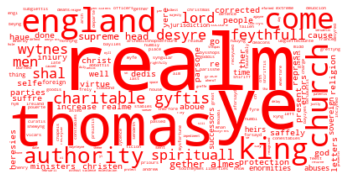

EDWARD VI:


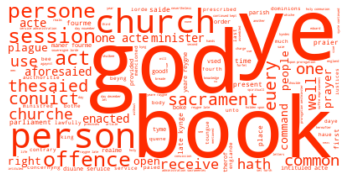

MARY I:


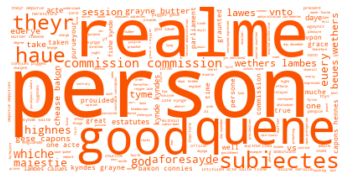

ELIZABETH:


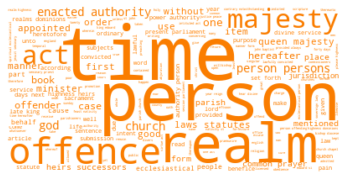

JAMES I:


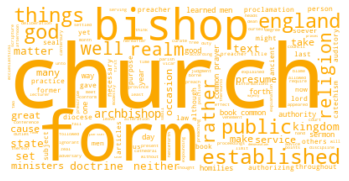

CHARLES I:


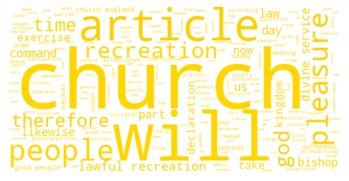

In [7]:
# make word clouds
def o1_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%%, %d%%)" % np.random.randint(49,51))
def o2_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(10,100%%, %d%%)" % np.random.randint(49,51))
def o3_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(20,100%%, %d%%)" % np.random.randint(49,51))
def o4_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(30,100%%, %d%%)" % np.random.randint(49,51))
def o5_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(40,100%%, %d%%)" % np.random.randint(49,51))
def o6_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(50,100%%, %d%%)" % np.random.randint(49,51))

print("HENRY VIII:")
h8_wordcloud = WordCloud(background_color="white").generate(henryVIIItxt)
h8_wordcloud.recolor(color_func = o1_color_func)
plt.imshow(h8_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("EDWARD VI:")
ed_wordcloud = WordCloud(background_color="white").generate(edwardtxt)
ed_wordcloud.recolor(color_func = o2_color_func)
plt.imshow(ed_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("MARY I:")
m_wordcloud = WordCloud(background_color="white").generate(marytxt)
m_wordcloud.recolor(color_func = o3_color_func)
plt.imshow(m_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("ELIZABETH:")
e_wordcloud = WordCloud(background_color="white").generate(elizabethtxt)
e_wordcloud.recolor(color_func = o4_color_func)
plt.imshow(e_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("JAMES I:")
j_wordcloud = WordCloud(background_color="white").generate(jamesItxt)
j_wordcloud.recolor(color_func = o5_color_func)
plt.imshow(j_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("CHARLES I:")
c_wordcloud = WordCloud(background_color="white").generate(charlesItxt)
c_wordcloud.recolor(color_func = o6_color_func)
plt.imshow(c_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis — Protestant v. Catholic

In [8]:
# split into labeled/unlabeled sentences
# run only one time, because of randomization (would get new sentences every time)

totSentences = makeTotSentences(crown_dict)
#random.shuffle(totSentences)

rel_labels = ["neutral", "neutral", "protestant",
              "protestant", "protestant", "protestant", 
              "protestant", "catholic", "protestant", 
              "protestant", "protestant", "catholic", 
              "protestant", "protestant", "catholic", 
              "neutral", "protestant", "neutral", "protestant",
              "protestant", "neutral", "neutral", "protestant", 
              "neutral", "catholic", "neutral", "protestant", 
              "neutral", "protestant", "protestant", "neutral", 
              "neutral", "protestant", "protestant", "protestant", 
              "protestant", "protestant", "neutral", "protestant", 
              "protestant", "neutral", "neutral", "protestant", 
              "neutral", "neutral", "neutral", "protestant", 
              "protestant", "protestant", "catholic", "catholic",
              "neutral", "protestant", "protestant", "protestant", 
              "protestant", "protestant", "neutral", "neutral", 
              "catholic", "neutral", "neutral", "catholic",
              "protestant", "protestant", "catholic", "protestant",
              "neutral", "protestant", "protestant", "neutral", 
              "neutral", "catholic", "catholic","neutral", 
              "protestant", "protestant", "protestant", "protestant", 
              "neutral", "protestant", "neutral", "neutral", "neutral", 
              "protestant", "catholic", "protestant", "neutral", "protestant", 
              "catholic", "neutral", "protestant","protestant", "protestant", "neutral"]

labeled =  [['All whiche dokettes, or brefes, the sayde hyghe constable, or constables, petie constable, or constables, headborowe or headborowes, shall deliuer ouer to the Justices of peace, at the next generall sessions to be holden within any of the sayde counties.'],


 ["Whereunto as her majesty instantly requireth all her good, faithful, and loving subjects to be assenting and aiding with due obedience, so if any shall disobediently use themselves to the breach hereof, her majesty both must and will see the same duly punished, both for the quality of the offence, and for example to all others neglecting her majesty's so reasonable commandment."],

 ["The queen's most royal majesty, by the advice of her most honourable council, intending the advancement of the true honour of Almighty God, the suppression of superstition throughout all her highness's realms and dominions, and to plant true religion to the extirpation of all hypocrisy, enormities, and abuses (as to her duty appertaineth), doth minister unto her loving subjects these godly Injunctions hereafter following."],

 ['And likewise we bar from this benefit and liberty all such known as recusants, either men or women, as will abstain from coming to church or divine service, being therefore unworthy of any lawful recreation after the said service, that will not first come to the church and serve God: prohibiting in like sort the said recreations to any that, though [they] conform in religion, are not present in the church at the service of God, before their going to the said recreations.'],

 ['And also one other Acte, made in one other session of the sayd parlyament, holden vpon prorogation at Westminster the fourth day of Nouember, in the thyrde yeare of the raygne of the sayde late kinge Edward the syxte, and there continued, and kept to the fyrst day of Febru+ary in the fourth yeare of his reygne, entituled, an Acte for thabolishyng and puttyng awaye of dyuers bookes and ymages.'],

 ["The report of this growing amendment amongst them made us the more sorry, when with our own ears we heard the general complaint of our people, that they were barred from all lawful recreation and exercise upon the Sunday's afternoon, after the ending of all divine service, which cannot but produce two evils: the one the hindering of the conversion of many, whom their priests will take occasion hereby to vex, persuading them that no honest mirth or recreation is lawful or tolerable in our religion, which cannot [Page 530] but breed a great discontentment in our people's hearts, especially of such as are peradventure upon the point of turning: the other inconvenience is, that this prohibition barreth the common and meaner sort of people from using such exercises as may make their bodies more able for war, when we or our successors shall have occasion to use them; and in place thereof sets up filthy tipplings and drunkenness, and breeds a number of idle and discontented speeches in their ale-houses."],

 ["Item, because in all alterations, and specially in rites [Page 436] and ceremonies, there happen discords amongst the people, and thereupon slanderous words and railings, whereby charity, the knot of all Christian society, is loosed; the queen's majesty being most desirous of all other earthly things, that her people should live in charity both towards God and man, and therein abound in good works, wills and straitly commands all manner her subjects to forbear all vain and contentious disputations in matters of religion, and not to use in despite or rebuke of any person these convicious words, papist or papistical heretic, schismatic or sacramentary, or any suchlike words of reproach."],

 ['Provided also, and be it enacted by the authority aforesaid, that where there is the like appeal now depending in the said Court of Rome between one Robert Harcourt, merchant of the staple, and Elizabeth Harcourt, otherwise called Elizabeth Robins, of the one part, and Anthony Fydell, merchant-stranger, on the other part, that the said Robert, Elizabeth, and Anthony, and every of them, shall and may, for the prosecuting and trying of their said appeal, have and enjoy the like remedy, benefit, and advantage, in like manner and form as the said Richard and Agnes, or any of them, has, may, or ought to have and enjoy; this Act or anything therein contained to the contrary in any wise notwithstanding.'],

 ['And that there be a modest and distinct song so used in all parts of the common prayers in the church, that the same may be as plainly understanded, as if it were read without singing; and yet nevertheless for the comforting of such that delight in music, it may be permitted, that in the beginning, or in the end of common prayers, either at morning or evening, there may be sung an hymn, or suchlike song to the praise of Almighty God, in the best sort of melody and music that may be conveniently devised, having respect that the sentence of the hymn may be understanded and perceived.'],

 ["Item, that no man shall take upon him to teach, but such as shall be allowed by the ordinary, and found meet as [Page 434] well for his learning and dexterity in teaching, as for sober and honest conversation, and also for right understanding of God's true religion."],

 ["Also, to avoid the detestable sin of simony, because buying and selling of benefices is execrable before God, therefore all such persons, as buy any benefices, or come to them by fraud or deceit, shall be deprived of such benefices, and be made unable at any time after to receive any other spiritual promotion; and such as do sell them, or by any colour do bestow them for their own gain and profit, shall lose their right and title of patronage and presentment for that time, and the gift thereof for that vacation shall appertain to the queen's majesty."],

 ["Where at the death of our late sovereign lord King Edward VI there remained one uniform order of common service and prayer, and of the administration of sacraments, rites, and ceremonies in the Church of England, which was set forth in one book, intituled: The Book of Common Prayer, and Administration of Sacraments, and other rites and ceremonies in the Church of England; authorized by Act of Parliament holden in the fifth and sixth years of our said late sovereign lord King Edward VI, intituled: An Act for the uniformity of common prayer, and administration of the sacraments; the which was repealed and taken away by Act of Parliament in the first year of the reign of our late sovereign lady Queen Mary, to the great decay of the due honour of God, and discomfort to the professors of the truth of Christ's religion:\n\nBe it therefore enacted by the authority of this present Parliament, that the said statute of repeal, and everything therein contained, only concerning the said book, and the service, administration of sacraments, rites, and ceremonies contained or appointed in or by the said book, shall be void and of none effect, from and after the feast of the Nativity of St. John Baptist next coming; and that the said book, with the order of service, and of the administration of sacraments, rites, and ceremonies, with the alterations and additions therein added and appointed by this statute, shall stand and be, from and after the said feast of the Nativity of St. John Baptist, in full force and effect, according to the tenor and effect of this statute; anything in the aforesaid statute of repeal to the contrary notwithstanding."],

 ["Our pleasure likewise is, that the bishop of that diocese take the like strait order with all the Puritans and Precisians within the same, either constraining them to conform themselves or to leave the county, according to the laws of our kingdom and canons of our Church, and so to strike equally on both hands against the contemners of our authority and adversaries of our Church: and as for our good people's lawful recreation, our pleasure likewise is, that after the end of divine service our good people be not disturbed, letted or discouraged from any lawful recreation, such as dancing, either men or women; archery for men, leaping, vaulting, or any other such harmless recreation, nor from having of May-games, Whitsun-ales, and Morris-dances; and the setting up of May-poles and other sports therewith used: so as the same be had in due and convenient time, without impediment or neglect of divine service: and that women shall have leave to carry rushes to the church for the decorating of it, according to their old custom; but withal we do here account still as prohibited all unlawful games to be used upon Sundays only, as bear and bull-baitings, interludes, and at all times in the meaner sort of people by law prohibited, bowling."],

 ['or above, either within this deanery, or elsewhere, shall distribute hereafter among their poor parishioners, or other inhabitants there, in the presence of the churchwardens, or some other honest man of the parish, the fortieth part of the fruits and revenues of their said benefice; lest they be worthily noted of ingratitude, which reserving so many parts to themselves, cannot vouchsafe to impart the fortieth portion thereof among the poor people of that parish, that is so fruitful and profitable unto them.'],

 ['Considering the cure and charge committed unto you we have thought good to call upon you to use all diligence possible thorough out your whole diocese as well by yourselves as by good ministers to persuade the people to resort more diligently to common prayer then they have done and there not only to pray with all their hearts in the fear of god as good and faithful men should do but also to have a better regard unto their living and specially to refrain their greedy appetites from that insatiable serpent of covetousness where with most men are so infected that it seems each one would devour another without charity or any godly respect to the poor to their neighbours or to their common wealth [wellbeing] for the which god hath not only now poured out this plague upon them but also prepared an other plague that after this life shall plague them everlastingly wherein \nyou must use those persuasions [reasons] that may engender a terror to reduce them from their corrupt naughty and detestable vices but as the body and members of a dull or sick head cannot be just or apt to do well.'],

 ['And if any such offender or offenders, after such conviction or attainder, do eftsoons commit or do the said offences, or any of them, in manner and form aforesaid, and be thereof duly convicted and attainted, as is aforesaid; that then every such offender and offenders shall for the same second offence incur into the dangers, penalties, and forfeitures ordained and provided by the statute of Provision and Praemunire, made in the sixteenth year of the reign of King Richard II.'],

 ['And we further will that publication of this our command be made by order from the bishops, through all the parish churches of their several dioceses respectively.'],

 ['And we wyll yt this protection shal re the space of an hole yere after the date of these presentis.'],

 ["That no parson, vicar, curate, or lecturer shall preach any sermon or collation hereafter upon Sundays and holidays in the afternoon, in any cathedral or parish church throughout this kingdom, but upon some part of the catechism, or some text taken out of the Creed, Ten Commandments, or the Lord's Prayer (funeral sermons only excepted), and that\xa0those preachers be most encouraged and approved of, who spend the afternoon's exercise in the examining of children in their catechism, and in the expounding of the several points and heads of the catechism, which is the most ancient and laudable custom of teaching in the Church of England."],

 ["And that the churchwardens, at the common charge of the parishioners, in every church shall provide a comely and honest pulpit, to be set in a convenient place within the same, and to be there seemly kept [60] for the preaching of God's word."],

 ['And as strongely & amply, as yf the sayde vndertakers deputies, & ser|uauntes were speciallye and perticulerlye recited and named in euerye of the same estatutes.'],

 ['Now our express will and pleasure is, that these feasts, with others, shall be observed, and that our justices of the peace, in their several divisions, shall look to it, both that all disorders there may be prevented or punished, and that all neighbourhood and freedom, with manlike and lawful exercises be used: and we further command our justices of assize in their several circuits to see that no man do trouble or molest any of our loyal and dutiful people, in or for their lawful recreations, having first done their duty to God, and continuing in obedience to us and our laws: and for this we command all our judges, justices of peace, as well within liberties as without, mayors, bailiffs, constables, and other officers, to take notice of; and to see observed, as they tender our displeasure.'],

 ['Also, that all proprietaries, parsons, vicars, and clerks, having churches, chapels, or mansions within this deanery, shall bestow yearly hereafter upon the same mansions or chancels of their churches, being in decay, the fifth part of that their benefices, till they be fully repaired, and shall always keep and maintain in good estate.'],

 ['Dated at London the daie of Iulie, in the first yere of our reigne.'],

 ['Forasmoche as it hath pleased almightie GOD, to call vnto his mercie the moste excellent Prince Kinge Edwarde the sixte, our late brother of most worthie memorie, whereby the Croune Impetiall of the Realmes of Englande, and Irelande, with the title of Fraunce, and all other thinges apperteining vnto the same, doe most rightfully, and lawfully belong vnto vs: We do signifie vnto you, that according to our saied right, and title, we dooe take vpon vs, and be in the iust, and lawefull possession of the same, not doubting but that all our true and faithfull Subiectes will so accept vs, take vs, and obeie vs, as their natural, and liege Souuetine Ladie, and Quene, according to ye dueties of their allegeaunce, assuring all our good, & faithful Subiectes, that in their so doing thei shal finde vs their benigne, and gracious Souuerein Ladie, as others our moste noble progenitours haue heretofore been.'],

 ['God saue the Quene.'],

 ["Albeit the king's Majesty justly and rightfully is and ought to be the supreme head of the Church of England, and so is recognized by the clergy of this realm in their convocations, yet nevertheless, for corroboration and confirmation thereof, and for increase of virtue in Christ's religion within this realm of England, and to repress and extirpate all errors, heresies, and other enormities and abuses heretofore used in the same, be it enacted, by authority of this present Parliament, that the king, our sovereign lord, his heirs and successors, kings of this realm, shall be taken, accepted, and reputed the only supreme head in earth of the Church of England, called\xa0Anglicans Ecclesia;\xa0and shall have and enjoy, annexed and united to the imperial crown of this realm, as well the title and style thereof, as all honors, dignities, preeminences, jurisdictions, privileges, authorities, immunities, profits, and commodities to the said dignity of the supreme head of the same Church belonging and appertaining; and that our said sovereign lord, his heirs and successors, kings of this realm, shall have full power and authority from time to time to visit, repress, redress, record, order, correct, restrain, and amend all such errors, heresies, abuses, offenses, contempts and enormities, whatsoever they be, which by any manner of spiritual authority or jurisdiction ought or may lawfully be reformed, repressed, ordered, redressed, corrected, restrained, or amended, most to the pleasure of Almighty God, the increase of virtue in Christ's religion, and for the conservation of the peace, unity, and tranquility of this realm; any usage, foreign land, foreign authority, prescription, or any other thing or things to the contrary hereof notwithstanding."],

 ['In wytnes wherof we haue caused these our present letters patentis to be made.'],

 ['Item, that no man shall wilfully and obstinately defend or maintain any heresies, errors, or false doctrine, contrary to the faith of Christ and His Holy Spirit.'],

 ["Lastly, that the archbishops and bishops of the kingdom, whom his majesty hath good cause to blame for this former remissness, be more wary and choice in licensing of preachers, and revoke all grants made to any chancellor, official, or commissary to pass licences in this kind; and that all the lecturers throughout the kingdom (a new body severed from the ancient clergy of England, as being neither parsons, vicars, or curates) be licensed henceforward in the Court of Faculties, only upon recommendation of the party from the bishop of the diocese under his hand and seal, with a 'fiat' from the lord Archbishop of Canterbury and a confirmation under the great seal of England; and that such as transgress any one of these directions, be suspended by the bishop of the diocese, or in his default, by the lord archbishop of the province, ab officio et beneficio, for a year and a day, until his majesty, by the advice of the next Convocation, shall prescribe some further punishment."],
 ['God saue the Quene.'],

 ['dayes apprehende, take or know of any suche, that they shall with diligence immediatlye certifie her sayde counsail therof, to thintent order may furthwith be geuen, for their punishment accordynge.'],

 ['The first is, that all deans, archdeacons, parsons, vicars, and all other ecclesiastical persons shall faithfully keep and observe, and as far as in them may lie, shall cause to be observed and kept of other, all and singular laws and statutes made for the restoring to the crown, the ancient jurisdiction over the state ecclesiastical, and abolishing of all foreign power, repugnant to the same.'],

 ["Also, because through lack of preachers in many places of the queen's realms and dominions the people continue in ignorance and blindness, all parsons, vicars, and curates shall read in their churches every Sunday one of the Homilies, which are and shall be set forth for the same purpose by the queen's [63] authority, in such sort, as they shall be appointed to do in the preface of the same."],

 ['Notwithstanding we thought meet, with consent of the bishops and other learned men there present, that some small things might rather be explained than changed; not that the same might not very well have been borne with by men who would have made a reasonable construction of them: but for that in a matter concerning the service of God we were very nice, or rather jealous, that the public form thereof should be free not only from blame but from suspicion, so as neither the common adversary should have advantage to wrest aught therein contained to other sense than the Church of England intendeth, nor any troublesome or ignorant person of this Church be able to take the least occasion of cavil against it.'],

 ['Yet notwithstanding, all parsons, vicars, and curates shall teach and declare unto their parishioners, that they may with a safe and quiet conscience, after their common prayer in the time of harvest, labour upon the holy and festival days, and save that thing which God hath sent; and if for any scrupulosity or grudge of conscience, men should superstitiously abstain from working upon those days, that then they should grievously offend and displease God.'],

 ['Also ye shall pray for the whole Commons of this realm, that they may live in true faith and fear of God, in humble obedience and brotherly charity one to another.'],

 ['And if any trespas or iniury be done vn them tha ye without delay shal se it duly corrected eformed.'],

 ["And if any such offender, which by the tenor and intent of this Act is to be abjured as is aforesaid, shall refuse to make such abjuration as is aforesaid, or after such abjuration made shall not go to such haven, and within such time as is before appointed, and from thence depart out of this realm, according to this present Act, or after such his departure shall return or come again into any her majesty's realms or dominions, without her majesty's special licence in that behalf first had and obtained; that then, in every such case, the person so offending shall be adjudged a felon,\xa0and shall suffer and lose as in case of felony without benefit of clergy."],

 ['It is true that at our first entry to this crown and kingdom we were informed, and that too truly, that our county of Lancashire abounded more in popish recusants than any county of England, and thus hath still continued since, to our great regret, with little amendment, save that, now of late, in our last riding through our said country: we find both by the report of the judges, and of the bishop of that diocese, that there is some amendment now daily beginning, which is no small contentment to us.'],

 ['Prouided alwayes and be it enacted by thaucthoritie aforesayde, for the better executi|on of thys acte and all other actes concernynge purueyours, that all and euerye commission and commissions that from henceforthe shabe made and graunted vnto any purueyour or purueyours, shalbe written and set forthe from tyme to tyme in the Englishe tonge, and not otherwyse.'],

 ['Provided always, and be it enacted as is aforesaid, that no manner of order, Act, or determination, for any matter of religion or cause ecclesiastical, had or made by the authority of this present Parliament, shall be accepted, deemed, interpreted, or adjudged at any time hereafter, to be any error, heresy, schism, or schismatical opinion; any order, decree, sentence, constitution, or law, whatsoever the same be, to the contrary notwithstanding.'],

 ["And be it also further enacted by authority aforesaid, that every person or persons, being subjects of this realm, which after the said forty days shall know and understand that any such Jesuit, seminary priest, or other priest abovesaid, shall abide, stay, tarry, or be within this realm or other the queen's dominions and countries, contrary to the true meaning of this Act, and shall not discover the same unto some justice of peace or other higher officer, within twelve days next after his said knowledge, but willingly conceal his knowledge therein; that every such offender shall make fine, and be imprisoned at the queen's pleasure."],

 ["So help me God, and by the contents of this book.'"],

 ['And if any person, after he, in form aforesaid, shall have been twice convicted of any offence concerning any of the last recited offences, shall offend the third time, and be thereof, in form abovesaid, lawfully convicted, that then every person so offending and convicted shall for his third offence forfeit to our sovereign lady the queen all his goods and chattels, and shall suffer imprisonment during his life.'],

 ['wytnes our selfe at westm~ the.'],

 ["Most humbly beseech your most excellent majesty, your faithful and obedient subjects, the Lords spiritual and temporal, and the Commons, in this your present Parliament assembled, that where in time of the reign of your most dear father, of worthy memory, King Henry VIII, divers good laws and statutes were made and established, as well for the utter extinguishment and putting away of all usurped and foreign powers and authorities out of this your realm, and other your highness's dominions and countries, as also for the restoring and uniting to the imperial crown of this realm the ancient jurisdictions, authorities, superiorities, and preeminences to the same of right belonging and appertaining, by reason whereof we, your most humble and obedient subjects, from the five-and-twentieth year of the reign of your said dear father, were continually kept in good order, and were disburdened of divers great and intolerable charges and exactions before that time unlawfully taken and exacted by such foreign power and authority as before that was usurped, until such time as all the said good laws and statutes, by one Act of Parliament made in the first and second years of the reigns of the late King Philip and Queen Mary, your highness's sister, intituled an Act repealing all statutes, articles, and provisions made against the See Apostolic of Rome since the twentieth year of King Henry VIII, and also for the establishment of all spiritual and ecclesiastical possessions and hereditaments conveyed to the laity, were all clearly repealed and made void, as by the same Act of repeal more at large does and may appear; by reason of which Act of repeal, your said humble subjects were eftsoons brought under an usurped foreign power and authority, and do yet remain in that bondage, to the intolerable charges of your loving subjects, if some redress, by the authority of this your High Court of Parliament, with the assent of your highness, be not had and provided:\n\nMay it therefore please your highness, for the repressing of the said usurped foreign power and the restoring of the rites, jurisdictions, and preeminences appertaining to the imperial crown of this your realm, that it may be enacted by the authority of this present Parliament, that the said Act made in the said first and second years of the reigns of the said late King Philip and Queen Mary, and all and every branch, clauses, and articles therein contained (other than such branches, clauses, and sentences as hereafter shall be excepted) may, from the last day of this session of Parliament, by authority of this present Parliament, be repealed, and shall from thenceforth be utterly void and of none effect."],

 ["Item, that all teachers of children shall stir and move them to the love and due reverence of God's true religion now truly set forth by public authority."],

 ['That out of our princely care that the churchmen may do the work which is proper unto them, the bishops and clergy, from time to time in convocation, upon their humble desire, shall have licence under our broad seal to deliberate of, and to do all such things as, being made plain by them, and assented unto by us, shall concern the settled continuance of the doctrine and discipline of the Church of England now established; from which we will not endure any varying or departing in the least degree.'],

 ['And for their authority in this behalf, be it further enacted by the authority aforesaid, that all and singular the same archbishops, bishops, and all other their officers exercising ecclesiastical jurisdiction, as well in place exempt as not exempt, within their dioceses, shall have full power and authority by this Act to reform, correct, and punish by censures of the Church, all and singular persons which shall offend within any their jurisdictions or dioceses, after the said feast of the Nativity of St. John Baptist next coming, against this Act and statute; any other law, statute, privilege, liberty, or provision heretofore made, had, or suffered to the contrary notwithstanding.'],

 ['Item, that no man shall talk or reason of the Holy Scriptures rashly or contentiously, nor maintain any false doctrine or error, but shall commune of the same, when occasion is given, reverently, humbly, and in the fear of God, for his comfort and better understanding.'],

 ['And therefore wylleth and streyghtly chargeth and commaundeth all her sayde good louynge subiectes, to lyue togethers in quiet sorte, & chri|stian charitie, leauynge those newe founde deuelishe termes of Papyste or Heretique, and suche lyke, and applyenge theyr whole eares, studye, and trauayle, to lyue in the feare of God, exercising theyr conuersations in suche charitable and godlye doynge, as theyr liues maye in dede expresse that great hunger and thyrst of Goddes glorye and holye worde, whiche by rashe talke and wor|des many haue pretended, and in so doynge, as they shall best please GOD, and lyue withoute daunger of the lawes, and maynteyne the tranquillite of the realme, wherof her hyghnesse shalbe most gladde: so yfanye man shall rashelye presume to make any assembles of people, or at any publique assembles or otherwyse, shall go aboute to styrre the people to disorder, or disquiet, she myndeth accordinge to her duetye, to see the same moost seuerely refourmed and punyshed, accordyng to her hygnesse lawes.'],

 ["And also, that if there shall happen any contempt or irreverence to be used in the ceremonies or rites of the Church, by the misusing of the orders appointed in this book, the queen's majesty may, by the like advice of the said commissioners or metropolitan, ordain and publish such further ceremonies or rites, as may be most for the advancement of God's glory, the edifying of His Church, and the due reverence of Christ's holy mysteries and sacraments."],

 ["That therefore in these both curious and unhappy differences, which have for so many hundred years, in different times and places, exercised the Church of Christ, we will, that all further curious search be laid aside, and these disputes shut up in God's promises, as they be generally set forth to us in the Holy Scriptures, and the general meaning of the Articles of the Church of England according to them."],

 ['Also, that they shall provide within three months next after this visitation at the charges of the parish, one book of the whole Bible of the largest volume in English; and within one twelve months next after the said visitation, the Paraphrases of Erasmus also in English upon the Gospel, and the same set up in some convenient place within the said church that they have cure of; whereas their parishioners may most commodiously resort unto the same, and read the same, out of the time of common service.'],

 ["Whereas her majesty understands that in many and sundry parts of the realm the altars of the churches be removed, and tables placed for administration of the Holy Sacrament, according to the form of the law therefor provided; and in some other places the altars be not yet removed, upon opinion conceived of some other order therein to be taken by her majesty's visitors; in the order whereof, saving for an uniformity, there seems no matter of great moment, so that the Sacrament be duly and reverently ministered; yet for observation of one uniformity through the whole realm, and for the better imitation of the law in that behalf, it is ordered that no altar be taken down, but by oversight of the curate of the church, and the churchwardens , or one of them at the least, wherein no riotous or disordered manner to be used."],

 ['And such as shall be so licensed, they shall gladly receive to declare the word of God at convenient times, without any resistance or contradiction.'],

 ['yere [...] our reigne'],

 ['Also, forasmuch as by laws established, every man is bound to pay his tithes, no man shall by colour of duty omitted by their curates, detain their tithes and so requite one wrong with another, or be his own judge; but shall truly pay the same, as  hath been accustomed, to  their parsons, vicars, and curates, without any restraint or diminution; and such lack and default as they can justly find in their parsons and curates, to call for reformation thereof at their ordinaries and other superiors, who, upon complaint and due proof thereof, shall reform the same accordingly.'],

 ['By the Quene,\nTHe\xa0Quenes highnes well remembrynge what great inconuenience and daungers haue growen to this her hyghnes realme in tyme past thorough the diuersitie of opinions, in questions of re|ligion, and hearing also that now of late, sithens the begynning of her moost graciouse reygne, the same contentions be agayne muche renewed thorowe certeyne false and vntrue reportes and eumors spredde by some lyght and euyll disposed persons, hath thought good to do to vnderstande to all her hyghnes moost louynge and obedient subiectes, her mooste gratious pleasure, in maner and fourme folowynge.'],

 ["And to the intent that all usurped and foreign power and authority, spiritual and temporal, may for ever be clearly extinguished, and never to be used or obeyed within this realm, or any other your majesty's dominions or coun-tries, may it please your highness that it may be further enacted by the authority aforesaid, that no foreign prince, person, prelate, state, or potentate, spiritual or temporal, shall at any time after the last day of this session of Parliament, use, enjoy, or exercise any manner of power, jurisdicdiction, superiority, authority, preeminence or privilege, spiritual or ecclesiastical, within this realm, or within any other your majesty's dominions or countries that now be, or hereafter shall be, but from thenceforth the same shall be clearly abolished out of this realm, and all other your highness's dominions for ever; any statute, ordinance, custom, constitutions, or any other matter or cause whatsoever to the contrary in any wise notwithstanding."],

 ['And that yf any of her sayed officers, after the sayed xxiiii.'],

 ['THe Quene our Soueraine Ladye, vnderstandynge that a nultitude of euyldisposed persones, beyng borne out of bet highnes dominions in other sundrie nations, fleinge from the obeysaunce of the Princes and rulers vnder whome they be borne, some for heresye, some for murder, treason.'],

 ['Provided always, and be it ordained and enacted by the authority aforesaid, that all and singular archbishops and bishops, and every their chancellors, commissaries, archdeacons, and other ordinaries, having any peculiar ecclesiastical jurisdiction.'],

 ["Every parson, vicar, and curate shall upon every holy day, and every second Sunday in the year, hear and instruct all the youth of the parish for half an hour at the least before evening prayer, in the Ten Commandments, the Articles of the Belief, and in the Lord's Prayer, and diligently examine them, and teach the Catechism set forth in the book of public prayer."],

 ['FYRST\xa0her maiestie being presently by thonely goodnes of God settled in her iust possession of thimperiall crowne of this realme, and other dominions therunto belongynge, can not nowe hyde that religion (whiche GOD and the worlde knoweth the hath euer professed from her infancy hitherto) whiche as her maiestie is mynded to obserue and maynteyne for her selfe by gods grace durynge her tyme, so dothe her highnes muche desyre, and woulde be gladde the same were of all her subiectes quietly and charitablye embraced.'],

 ['For we found mighty and vehement informations supported with so weak and slender proofs, as it appeared unto us and our council, that there was no\xa0cause why any change should have been at all in that which was most impugned, the Book of Common Prayer, containing the form of the public service of God here established, neither in the doctrine which appeared to be sincere, nor in the forms and rites which were justified out of the practice of the primitive Church.'],

 ['Be it therfore enacted by the aucthoritie of thys present parliament, that all and euerye suche lawes, statutes, and prouisions, as heretofore haue bene made and ordeyned agaynste purueyours, and all and euerye the paynes, penalties, forfeyture, and losse, contayned, men|cioned, or appointed, in any of the same lawes or estatutes against purueyours and takers, or any of them, shal also be extended & executed vpon euery of theyr vndertakers, deputies, and seruauntes.'],

['Item, that no persons shall use charms, sorceries, enchantments, witchcraft, soothsaying, or any suchlike devilish device, nor shall resort at any time to the same for counsel or help.'],

 ["Item, that they, the persons above rehearsed, shall preach in their own persons, once in every quarter of the year at the least, one sermon, being licensed especially thereunto, as is specified hereafter; or else shall read some homily prescribed to be used by the queen's authority every Sunday at the least, unless some other preacher sufficiently licensed, as hereafter, chance to come to the parish for the same purpose of preaching."],

 ['God save the queen.'],

 ['Which thing all true louinge and obedient subiectes, ought, and are bounden to forsee and prouide to thuttermoost of their power.'],

 ['And if no sentence shall be given at the Court of Rome in the said appeal for the reversing of the said pretended sentence before the end of the said threescore days, that then it shall and may be lawful for the said Richard and Agnes, and either of them, at any time hereafter, to commence, take, sue, and prosecute their said appeal from the said pretended sentence, and for the reversing of the said pretended sentence, within this realm, in such like manner and form as was used to be pursued, or might have been pursued, within this realm, at any time since the twenty-fourth year of the reign of the said late King Henry VIII, upon any sentences given in the court or courts of any archbishop within this realm.'],

 ['AND\xa0it is ordeigned and enacted, by the aucthoritie aforesaied, that all and euery Iustices of\xa0oyer and, Determiner,\xa0or Iustices of Assise, shall haue full power and aucthoritie, in euery of their open and generall Sessions, to enquire, heare and determyne, all and all maner of offences, that shalbee committed or doen contrary to any article, conteigned in this present act, within the limittes of the Commission to the directed and to make proces for the execution of the same, as thei maie doo against any persone, beyng endited before them, of trespasse or lawfully conuicted thereof.'],

 ['And if any person or persons, being once convicted of any such offence, eftsoons offend against any of the last recited offences, and shall, in form aforesaid, be thereof lawfully convicted, that then the same person so offending and convicted shall, for the second offence, forfeit to the queen our sovereign lady, her heirs and successors, four hundred marks.'],

 ["And also the money which rise of fraternities, guilds, and other stocks of the Church (except by the queen's  majesty's authority it be otherwise appointed) shall be put in the said chest, and converted to the said use; and also the rents of lands, the profit of cattle, and money given or bequeathed to obits and dirges, and  to the finding of torches, lights, tapers, and lamps, shall be converted to the said use; saving that it shall be lawful for them to bestow part of the said profits upon the reparation of the said church, if great need require, and whereas the parish is very poor, and not able otherwise to repair the same."],

 ['And that it may be also enacted, that if any such archbishop, bishop, or other ecclesiastical officer or minister, or any of the said temporal judges, justiciaries, or other lay officer or minister, shall peremptorily or obstinately refuse to take or receive the said oath, that then he so refusing shall forfeit and lose, only during his life, all and every ecclesiastical and spiritual promotion, benefice, and office, and every temporal and lay promotion and office, which he has solely at the time of such refusal made; and that the whole title, interest, and incumbency, in every such promotion, benefice, and other office, as against such person only so refusing, during his life, shall clearly cease and be void, as though the party so refusing were dead.'],

 ["And that if any manner of parson, vicar, or other whatsoever minister, that ought or should sing or say common prayer mentioned in the said book, or minister the sacraments, from and after the feast of the nativity of St. John Baptist next coming, refuse to use the said common prayers, or to minister the sacraments in such cathedral or parish church, or other places as he should use to minister the same, in such order and form as they be mentioned and set forth in the said book, or shall wilfully or obstinately standing in the same, use any other rite, ceremony, order, form, or manner of celebrating of the Lord's Supper, openly or privily, or Matins, Evensong, administration of the sacraments, or other open prayers, than is mentioned and set forth in the said book (open prayer in and throughout this Act, is meant that prayer which is for other to come unto, or hear, either in common churches or private chapels or oratories, commonly called the service of the Church), or shall preach, declare, or speak anything in the derogation or depraving of the said book, or anything therein contained, or of any part thereof, and shall be thereof lawfully convicted, according to the laws of this realm, by verdict of twelve men, or by his own confession, or by the notorious evidence of the fact, shall lose and forfeit to the queen's highness, her heirs and successors, for his first offence, the profit of all his spiritual benefices or promotions coming or arising in one whole year next after his conviction; and also that the person so convicted shall for the same offence suffer imprisonment by the space of six months, without bail or mainprize."],

 ['And be it further enacted and ordained by the authority aforesaid, that if any person which shall be suspected to be a Jesuit, seminary or massing priest, being examined by any person having lawful authority in that behalf to examine such person which shall be so suspected, shall refuse to answer directly and truly whether he be a Jesuit, or a seminary or massing priest, as is aforesaid, every such person so refusing to answer shall for his disobedience and contempt in that behalf, be committed to prison by such as shall examine him as is aforesaid, and thereupon shall remain and continue in prison without bail or mainprize, until he shall make direct and true answer to the said questions whereupon he shall be so examined.'],

 ['And be it further enacted by the aucthoritie aforesayde, that to euery such commission or commissions after the sayd byrth of our Lord to be made, graunted, and directed, as is afore+sayd, shalbe annexed so many blanckes in parchement, as there shalbe seuerall counties ex|pressed, named, and contayned within the sayde commission or commission or anye of them in the which blanckes shalbe fayre and legeably written, all and euery such beues, wethers lambes, calfes, swyne, anye kinde of salte fishe, or anye kynde or kyndes of grayne, butter, chease, bakon, connies, pigges, gese, capons, and hennes, wyth the true and seuerall prices of the same, and euerye of them as shalbe leuied, gathered, and purueyed, by anye person or persons, theyr deputie or deputies, or anye of them as shalbe therevnto aucthorised, by anye suche commission or commissions aforesayde, within anye perticuler towne, parishe, or hamlet, set, lyinge, and beynge, within anye those countie or counties, as shalbe named, contayned, and expressed, within the sayde commission or commissions, or anye of them, wherevnto shalbe subscribed the name or signe manuell of all and euery suche high constable or constables, petie constable or constables, headborowe, or headborowes, as shalbe by anye precepte to hym or them directed, by anye person or persons, theyr deputie or deputies, or any of them, aucthorised therevnto by suche commission or commissions to be graunted, as is aforesayde, priuie or knowledgynge to the deliuerye of the sayde beues, wethers, lambes, calues, any kynde of salt fishe, or anye kynde or kyndes of grayne, butter, chease, bakon, connies, pigges, gese, capons, and hennes, or anye of them.'],

 ["B., do utterly testify and declare in my conscience, that the queen's highness is the only supreme governor of this realm, and of all other her highness's dominions and countries, as well in all spiritual or ecclesiastical things or causes, as temporal, and that no foreign prince, person, prelate, state or potentate, has, or ought to have, any jurisdiction, power, superiority, preeminence, or authority ecclesiastical or spiritual, within this realm; and therefore I do utterly renounce and forsake all foreign jurisdictions, powers, superiorities, and authorities, and do promise that from henceforth I shall bear faith and true allegiance to the queen's highness, her heirs and lawful successors, and to my power shall assist and defend all jurisdictions, pre-eminences, privileges, and authorities granted or belonging to the queen's highness, her heirs and successors, or united and annexed to the imperial crown of this realm."],

 ['It is assuredlye knowen vnto her maiestie, that not onely their secrete practises haue not fayled to styrre comforte and ayde, diuerse her highnes subiectes, to this most vnnatural rebellion, against god and her grace, but also some other of them, desiste not styl to practise with her people eftsones to rebell: Her maiestie therfore hauynge (as is afore sayde) knowledge and intelligence hereof, hath for remedie herin determined, and most strayghtly chargeth and commaudeth, that all & every such persone or persons borne out of her highnes dominions, now commoraunte or resiaunte within this Realme, of what soeuer nation or countreye, beynge eyther preacher, prynter, bokeseller, or other artificer or of whatsoeuer callynge els, not beinge denizen, or merchaunt knowen, vsyng the trade of merchaundise, or seruaunt to suche Ambassadours as beliegers here, from the princes and states ioyned in league with her grace, shall within.'],

 ['And nevertheless, their just titles and rights they may charitably prosecute before such as have authority to hear the same.'],

['The which alms and devotion of the people the keepers of the keys shall at times convenient take out of the chest, and distribute the same in the presence of the whole parish, or six of them, to be truly and faithfully delivered to their most needy neighbours; and if they be provided for, then to the reparation of highways next adjoining, or to the poor people of such parishes near, as shall be thought best to the said keepers of the keys.'],

 ["All which Injunctions her highness willeth and commandeth her loving subjects obediently to receive, and truly to observe and keep, every man in their offices, degrees, and states, as they will avoid her highness's displeasure, and pains of the same hereafter expressed."],

 ["And where one pretended sentence has heretofore been given in the Consistory in Paul's before certain judges delegate, by the authority legatine of the late Cardinal Pole, by reason of a foreign usurped power and authority, against Richard Chetwood, Esq., and Agnes his wife, by the name of Agnes Woodhall, at the suit of Charles Tyrril, gentleman, in a cause of matrimony solemnized between the said Richard and Agnes, as by the same pretended sentence more plainly doth appear, from which sentence the said Richard and Agnes have appealed to the Court of Rome, which appeal does there remain, and yet is not determined: may it therefore please your highness, that it may be enacted by the authority aforesaid, that if sentence in the said appeal shall happen to be given at the said Court of Rome for and in the behalf of the said Richard and Agnes, for the reversing of the said pretensed sentence, before the end of threescore days next after the end of this session of this present Parliament, that then the same shall be judged and taken to be good and effectual in the law, and shall and may be used, pleaded, and allowed in any court or place within this realm; anything in this Act or any other Act or statute contained to the contrary notwithstanding."],

["shall have full power and authority by virtue of this Act, as well to inquire in their visitation, synods, and elsewhere within their jurisdiction at any other time and place, to take occasions (sic) and informations of all and every the things above mentioned, done, committed, or perpetrated within the limits of their jurisdictions and authority, and to punish the same by admonition, excommunication, sequestration, or deprivation, and other censures and processes, in like form as heretofore has been used in like cases by the queen's ecclesiastical laws."],

['And that the names of such as shall allow the same to be added in the end of every such work, for a testimony of the allowance thereof.'],

 ['And every person which after the end of the same forty days, and after such time of departure as is before limited and appointed, shall wittingly and willingly receive, relieve, comfort, aid, or maintain any such Jesuit, seminary priest, or other priest, deacon, or religious or ecclesiastical person, as is aforesaid, being at liberty, or out of hold, knowing him to be a Jesuit, seminary priest, or other such priest, deacon, or religious or ecclesiastical person, as is aforesaid, shall also for such offence be adjudged a felon, without benefit of clergy, and suffer death, lose, and forfeit, as in case of one attainted of felony.'],

 ['And that no other kynd nor order of diuine seruice, nor administration of Sacramentes, be after the sayde twenteth day of December, vsed or ministred in anye other maner, fourme, or degree within the sayde realme of England, or other the Quenes dominions, then was most comenly vsed, ministred, and frequented in the sayde laste yeare of the raygne of the sayde late kynge Henry theyght.'],

 ["And for the more speedy levying and recovering, for and by the queen's majesty, of all and singular the pains, duties, forfeitures and payments which at any time hereafter shall accrue, grow, or be payable by virtue of this Act, or of the statute made in the three and twentieth year of her majesty's reign concerning recusants; be it enacted by the authority aforesaid, that all and every the said pains, duties, forfeitures, and payments, shall and may be recovered and levied to her majesty's use, by action of debt, bill, plaint, information, or otherwise, in any of the courts commonly called the king's bench, common pleas, or exchequer, in such sort, and in all respects, as by the ordinary course of the common laws of this realm any other debt due by any such person in any other case should or may be recovered or levied, wherein no essoin, protection, or wager of law shall be admitted or allowed."],

 ['Or such other order of prayers, as shall be hereafter appointed.'],

 ['And in cathedral or collegiate churches the same shall be done in such places, and in such sort, as our commissioners in our visitation shall appoint.'],

 ["And for the better observation and maintenance of this Act, may it please your highness that it may be further enacted by the authority aforesaid, that all and every archbishop, bishop, and all and every other ecclesiastical person, and other ecclesiastical officer and minister; of what estate, dignity, preeminence, or degree soever he or they be or shall be, and all and every temporal judge, justice, mayor, and other lay or temporal officer and minister, and every other person having your highness's fee or wages, within this realm, or any your highness's dominions, shall make, take, and receive a corporal oath upon the evangelist, before such person or persons as shall please your highness, your heirs or successors, under the great seal of England to assign and name, to accept and to take the same according to the tenor and effect hereafter following, that is to say:\n\n'I, A."],

 ['suffre emprisonment, by the space of three monethes, without baill or mainprise.']]

# designate unlabeled sentences
unlabeled = []
for sentence in totSentences:
    if sentence not in labeled:
        unlabeled.append((sentence[0], 'label'))

# assign labels to sentences
rel_labeled = []
i=0
for sentence in labeled:
    rel_labeled.append((sentence[0], rel_labels[i]))
    i+=1

print("labeled sentences:", len(labeled))
print("unlabeled sentences:", len(unlabeled))
print("total sentences:", len(totSentences))
#rel_labeled

labeled sentences: 95
unlabeled sentences: 277
total sentences: 374


In [9]:
# split labeled into train and test set
random.shuffle(rel_labeled)
l_train = rel_labeled[:64]
l_test = rel_labeled[64:]

In [19]:
# create the model
classifier = NaiveBayesClassifier(l_train)
# checking accuracy
print(classifier.accuracy(l_test))

0.6451612903225806


In [43]:
# optimization
max_accuracy = 0
max_classifier = 0

for i in range(1000):  
    # split labeled into train and test set
    random.shuffle(rel_labeled)
    l_train = rel_labeled[:64]
    l_test = rel_labeled[64:]
    # create the model
    rclassifier = NaiveBayesClassifier(l_train)
    # checking accuracy
    r = rclassifier.accuracy(l_test)
    if r > max_accuracy:
        max_accuracy = r
        max_classifier = rclassifier
    #print(i)
        
print(max_accuracy)

0.9032258064516129


In [44]:
avg_list = []
years = [1604, 1559, 1559, 1551, 1558, 1551, 1549, 1553, 1628, 
         1520, 1622, 1633, 1559, 1553, 1593, 1555, 1553, 1554, 
         1585, 1553, 1534,1593,1571,1554,1547]
# assign numeric values to classifications
i = 0
for file in crown_dict:
    summ = 0;
    for sentence in crown_dict[file][1]:
        pred = max_classifier.classify(sentence)
        if pred == "protestant":
            summ += 1
        if pred == "neutral":
            summ += 0
        if pred == "catholic":
            summ += -1
    avg = summ/len(crown_dict[file][1]) 
    avg_list.append((avg,years[i]))
    i+=1
 
print(Sort_Tuple(avg_list))

x=[]
y=[]
for value in avg_list:
    x.append(value[1])
    y.append(value[0])

[(0.15789473684210525, 1520), (1.0, 1534), (1.0, 1547), (0.15384615384615385, 1549), (0.3333333333333333, 1551), (1.0, 1551), (0.4117647058823529, 1553), (-0.25, 1553), (-0.25, 1553), (0.0, 1553), (0.0, 1554), (1.0, 1554), (0.0, 1555), (0.3333333333333333, 1558), (0.37037037037037035, 1559), (0.6486486486486487, 1559), (0.7310924369747899, 1559), (0.75, 1571), (0.9333333333333333, 1585), (0.7692307692307693, 1593), (0.8888888888888888, 1593), (0.9375, 1604), (1.0, 1622), (0.875, 1628), (0.75, 1633)]


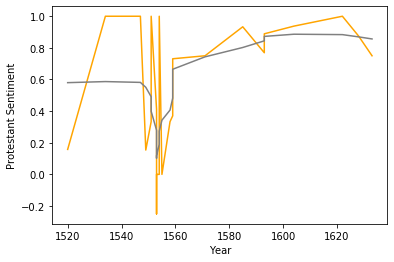

In [45]:
# plot religion graph
smoothed = gaussian_filter1d(y, sigma=2)

plt.plot(x, y, color = "orange") 
plt.plot(x, smoothed, color = "0.5")
   
plt.ylabel('Protestant Sentiment') 
plt.xlabel('Year') 
  
plt.show() 

# Sentiment Analysis — Deference to the Crown

In [46]:
def_labels = ["no", "yes", "yes", "no", "no", "no", "yes", "no", "no", "no", "no", "yes", "no", 
              "no", "yes", "yes", "yes", "no", "no", "no", "no", "yes", "no", "no", "yes", "yes", 
              "yes", "no", "no", "no", "yes", "yes", "yes", "yes", "no", "no", "no", "no", "yes",
              "no", "no", "yes", "no", "no", "yes", "no", "yes", "no", "no", "no", "no", "yes", 
              "yes", "no", "no", "no", "no", "yes", "no", "yes", "yes", "no", "yes", "no", "no", 
              "yes", "no", "no", "no", "no", "yes", "yes", "no", "no", "yes", "yes", "no", "no", 
              "no", "no", "yes", "yes", "no", "no", "yes", "no", "yes", "no", "no", "yes", "yes", 
              "no", "no", "no", "no"]

# assign labels to sentences
def_labeled = []
i=0
for sentence in labeled:
    def_labeled.append((sentence[0], def_labels[i]))
    i+=1

In [47]:
# split labeled into train and test set
random.shuffle(def_labeled)
dl_train = def_labeled[:64]
dl_test = def_labeled[64:]

In [48]:
# create the model
dclassifier = NaiveBayesClassifier(dl_train)
# checking accuracy
dclassifier.accuracy(dl_test)

0.7096774193548387

In [53]:
# optimization
dmax_accuracy = 0
dmax_classifier = 0

for i in range(1000):  
    # split labeled into train and test set
    random.shuffle(def_labeled)
    l_train = def_labeled[:64]
    l_test = def_labeled[64:]
    # create the model
    rdclassifier = NaiveBayesClassifier(l_train)
    # checking accuracy
    rd = rdclassifier.accuracy(l_test)
    if rd > dmax_accuracy:
        dmax_accuracy = rd
        dmax_classifier = rdclassifier
    #print(i)
        
print(dmax_accuracy)

0.9354838709677419


In [54]:
davg_list = []
years = [1604, 1559, 1559, 1551, 1558, 1551, 1549, 1553, 1628, 
         1520, 1622, 1633, 1559, 1553, 1593, 1555, 1553, 1554, 
         1585, 1553, 1534, 1593, 1571, 1554, 1547]

# assign numeric values to classifications
i = 0
for file in crown_dict:
    summ = 0;
    for sentence in crown_dict[file][1]:
        pred = dmax_classifier.classify(sentence)
        if pred == "yes":
            summ += 1
        if pred == "neutral":
            summ += 0
        if pred == "no":
            summ += -1
    avg = summ/len(crown_dict[file][1]) 
    davg_list.append((avg,years[i]))
    i+=1
 
print(Sort_Tuple(davg_list))

dx=[]
dy=[]
for value in davg_list:
    dx.append(value[1])
    dy.append(value[0])

[(-1.0, 1520), (1.0, 1534), (-1.0, 1547), (-0.8461538461538461, 1549), (-0.3333333333333333, 1551), (1.0, 1551), (-0.29411764705882354, 1553), (0.75, 1553), (0.0, 1553), (-0.2, 1553), (0.25, 1554), (-1.0, 1554), (-0.8823529411764706, 1555), (-0.3333333333333333, 1558), (0.1111111111111111, 1559), (0.1891891891891892, 1559), (-0.6638655462184874, 1559), (-0.75, 1571), (-0.3333333333333333, 1585), (-0.07692307692307693, 1593), (-0.4444444444444444, 1593), (-1.0, 1604), (-1.0, 1622), (-1.0, 1628), (-0.875, 1633)]


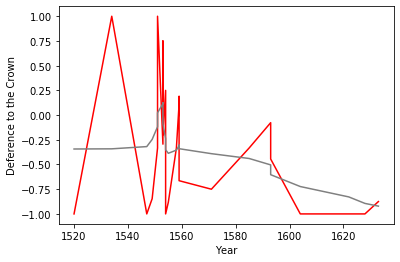

In [55]:
# plot deference graph
dsmoothed = gaussian_filter1d(dy, sigma=2)

plt.plot(dx, dy, color = "red") 
plt.plot(dx, dsmoothed, color = "0.5")
   
plt.ylabel('Deference to the Crown') 
plt.xlabel('Year') 
  
plt.show() 

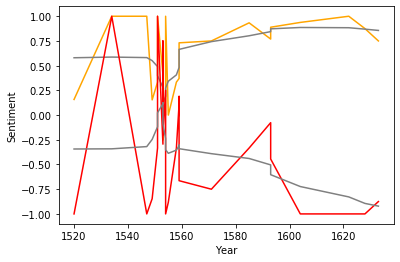

In [57]:
# plot both graph
smoothed = gaussian_filter1d(y, sigma=2)

plt.plot(x, y, color = "orange") 
plt.plot(x, smoothed, color = "0.5")

dsmoothed = gaussian_filter1d(dy, sigma=2)

plt.plot(dx, dy, color = "red") 
plt.plot(dx, dsmoothed, color = "0.5")
   
plt.ylabel('Sentiment') 
plt.xlabel('Year') 
  
plt.show() 